<a href="https://colab.research.google.com/github/gcasar1/estudos/blob/main/trabalhoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Conforme analisado nas disciplinas anteriores, você possui acesso aos dados de clientes da Quantum Finance,
composto por mais de uma centena de variáveis independentes. A esta altura você já tem uma percepção da importância de cada um delas.
Partindo deste ponto, realize:
0) Selecione uma das opções de base de dados (ou se se preferir trabalhe as duas)
1) Apresente uma análise descritiva destes dados
2) Entenda que tipo de análise preditiva você quer realizar,
se classificação ou regressão, e qual algoritmo lhe traz o melhor resultado.
2)  Realize um exercício para prever/inferir esta com base em combinação de variáveis diferentes. Experimente também com diversos tipos de algoritmos.
Para todos eles, mensure a assertividade tanto nos dados de treino quanto de teste. Discorra sobre esses resultados
3) Não esqueça de apresentar suas análises/conclusões de negócio ao decorrer de todo trabalho
```



In [ ]:
from sklearn.preprocessing import StandardScaler
#from sklearn import cross_validation
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv("https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/dataset%20-%20tr.csv")
dados

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,35996,C,10,Web,0,1,F,4,0,0,...,0,0,0,0,1,N,68,588,588,0
35996,35997,C,10,Web,0,1,F,2,2,0,...,0,0,0,0,1,N,39,684,684,0
35997,35998,C,10,0,0,1,M,2,0,0,...,0,0,0,0,1,N,54,298,298,0
35998,35999,C,15,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,28,570,570,1


In [ ]:
# Verifica o total de valores únicos por coluna
dados.nunique()

ID_CLIENTE                           36000
TIPO_FUNCIONARIO                         1
DIA_PAGAMENTO                            6
TIPO_ENVIO_APLICACAO                     3
QUANT_CARTOES_ADICIONAIS                 1
TIPO_ENDERECO_POSTAL                     2
SEXO                                     4
ESTADO_CIVIL                             8
QUANT_DEPENDENTES                       16
NIVEL_EDUCACIONAL                        1
ESTADO_NASCIMENTO                       28
CIDADE_NASCIMENTO                     8211
NACIONALIDADE                            3
ESTADO_RESIDENCIAL                      27
CIDADE_RESIDENCIAL                    3103
BAIRRO_RESIDENCIAL                   11754
FLAG_TELEFONE_RESIDENCIAL                2
CODIGO_AREA_TELEFONE_RESIDENCIAL        92
TIPO_RESIDENCIA                          6
MESES_RESIDENCIA                        79
FLAG_TELEFONE_MOVEL                      1
FLAG_EMAIL                               2
RENDA_PESSOAL_MENSAL                  4439
OUTRAS_REND

In [ ]:
dados.shape

(36000, 54)

In [ ]:
dados.describe()

,ID_CLIENTE,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,TIPO_RESIDENCIA,MESES_RESIDENCIA,...,NIVEL_EDUCACIONAL_CONJUGE,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU=1
count,36000.000000,36000.000000,36000.0,36000.000000,36000.000000,36000.000000,36000.0,36000.000000,35031.000000,33260.000000,...,12733.000000,36000.0,36000.0,36000.0,36000.0,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,18000.500000,12.873167,0.0,1.006472,2.147639,0.650694,0.0,0.960917,1.250664,9.677901,...,0.301029,0.0,0.0,0.0,0.0,1.275056,43.259028,584.785389,584.785389,0.258167
std,10392.449182,6.616509,0.0,0.080190,1.323863,1.167641,0.0,0.203855,0.864168,10.638816,...,0.963729,0.0,0.0,0.0,0.0,0.982052,14.973610,228.109166,228.109166,0.437632
min,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,1.000000,6.000000,105.000000,105.000000,0.000000
25%,9000.750000,10.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,1.000000,31.750000,450.000000,450.000000,0.000000
50%,18000.500000,10.000000,0.0,1.000000,2.000000,0.000000,0.0,1.000000,1.000000,6.000000,...,0.000000,0.0,0.0,0.0,0.0,1.000000,41.000000,600.000000,600.000000,0.000000
75%,27000.250000,15.000000,0.0,1.000000,2.000000,1.000000,0.0,1.000000,1.000000,15.000000,...,0.000000,0.0,0.0,0.0,0.0,1.000000,53.000000,738.000000,738.000000,1.000000
max,36000.000000,25.000000,0.0,2.000000,7.000000,15.000000,0.0,2.000000,5.000000,228.000000,...,5.000000,0.0,0.0,0.0,0.0,7.000000,106.000000,999.000000,999.000000,1.000000


In [ ]:
dados['RENDA_PESSOAL_TOTAL'] = dados['RENDA_PESSOAL_MENSAL'] + dados['OUTRAS_RENDAS']

In [ ]:
dados.dropna(subset=['TIPO_RESIDENCIA'], how='all',inplace=True)
dados.reset_index(inplace=True, drop=True)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35031 entries, 0 to 35030
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         35031 non-null  int64  
 1   TIPO_FUNCIONARIO                   35031 non-null  object 
 2   DIA_PAGAMENTO                      35031 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               35031 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           35031 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               35031 non-null  int64  
 6   SEXO                               35031 non-null  object 
 7   ESTADO_CIVIL                       35031 non-null  int64  
 8   QUANT_DEPENDENTES                  35031 non-null  int64  
 9   NIVEL_EDUCACIONAL                  35031 non-null  int64  
 10  ESTADO_NASCIMENTO                  35031 non-null  object 
 11  CIDADE_NASCIMENTO                  35031 non-null  obj

In [ ]:
# Supondo que 'dados' seja o nome do seu DataFrame
for col in dados.columns:
    # Executa a instrução para cada coluna
    result = dados.groupby([col]).size().sort_values(ascending=False)
    print(f"Resultados para a coluna '{col}':")
    print(result)
    print("\n")

Resultados para a coluna 'ID_CLIENTE':
ID_CLIENTE
1        1
24018    1
24011    1
24012    1
24013    1
        ..
12010    1
12009    1
12008    1
12007    1
36000    1
Length: 35031, dtype: int64


Resultados para a coluna 'TIPO_FUNCIONARIO':
TIPO_FUNCIONARIO
C    35031
dtype: int64


Resultados para a coluna 'DIA_PAGAMENTO':
DIA_PAGAMENTO
10    14267
15     6097
5      5199
25     4918
20     3311
1      1239
dtype: int64


Resultados para a coluna 'TIPO_ENVIO_APLICACAO':
TIPO_ENVIO_APLICACAO
Web      19505
0        13896
Carga     1630
dtype: int64


Resultados para a coluna 'QUANT_CARTOES_ADICIONAIS':
QUANT_CARTOES_ADICIONAIS
0    35031
dtype: int64


Resultados para a coluna 'TIPO_ENDERECO_POSTAL':
TIPO_ENDERECO_POSTAL
1    34804
2      227
dtype: int64


Resultados para a coluna 'SEXO':
SEXO
F    21572
M    13408
N       38
        13
dtype: int64


Resultados para a coluna 'ESTADO_CIVIL':
ESTADO_CIVIL
2    18190
1    10676
4     2950
6     1293
5      930
3      449
7      400

In [ ]:
# Removendo
dados.drop(['ID_CLIENTE', 'TIPO_FUNCIONARIO', 'QUANT_CARTOES_ADICIONAIS', 'TIPO_ENDERECO_POSTAL', 'CIDADE_RESIDENCIAL',
            'CIDADE_NASCIMENTO','FLAG_TELEFONE_RESIDENCIAL', 'CODIGO_AREA_TELEFONE_RESIDENCIAL', 'RENDA_PESSOAL_MENSAL',
            'FLAG_TELEFONE_MOVEL', 'VALOR_PATRIMONIO_PESSOAL', 'ESTADO_PROFISSIONAL', 'BAIRRO_PROFISSIONAL', 'OUTRAS_RENDAS','BAIRRO_RESIDENCIAL',
            'FLAG_TELEFONE_PROFISSIONAL', 'NIVEL_EDUCACIONAL_CONJUGE', 'CODIGO_PROFISSAO','CODIGO_PROFISSAO_CONJUGE', 'MESES_RESIDENCIA','ESTADO_RESIDENCIAL',
            'CODIGO_AREA_TELEFONE_PROFISSIONAL', 'CIDADE_PROFISSIONAL','MESES_NO_TRABALHO', 'FLAG_DOCUMENTO_RESIDENCIAL','ESTADO_NASCIMENTO',
            'FLAG_RG', 'FLAG_CPF', 'FLAG_COMPROVANTE_RENDA', 'FLAG_REGISTRO_ACSP', 'CEP_RESIDENCIAL_3', 'CEP_PROFISSIONAL_3'], axis=1, inplace=True)

In [ ]:
# Encontrar as células com valores nulos
null_data = dados[dados.isnull().any(axis=1)]
null_data

,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,TIPO_RESIDENCIA,FLAG_EMAIL,FLAG_VISA,...,FLAG_OUTROS_CARTOES,QUANT_CONTAS_BANCARIAS,QUANT_CONTAS_BANCARIAS_ESPECIAIS,QUANT_CARROS,EMPRESA,TIPO_OCUPACAO,PRODUTO,IDADE,ROTULO_ALVO_MAU=1,RENDA_PESSOAL_TOTAL
2,5,Web,F,2,0,0,1,1.0,1,0,...,0,0,0,0,N,NaN,1,27,0,500.0
11,25,Web,F,1,1,0,1,1.0,1,0,...,0,0,0,0,N,NaN,1,41,0,380.0
13,5,Web,F,1,0,0,1,1.0,1,0,...,0,0,0,0,Y,NaN,1,19,1,375.0
27,5,Web,F,1,0,0,1,1.0,1,0,...,0,0,0,0,N,NaN,1,32,0,1500.0
35,20,Web,M,2,0,0,1,1.0,1,0,...,0,0,0,0,Y,NaN,1,38,0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34987,10,Web,F,4,0,0,1,1.0,1,1,...,0,0,0,0,Y,NaN,1,64,1,350.0
34993,15,Web,F,2,0,0,1,1.0,1,0,...,0,0,0,0,N,NaN,1,59,0,309.0
34999,15,0,F,1,0,0,1,1.0,1,0,...,0,1,1,0,N,NaN,1,65,0,350.0
35007,25,Web,F,1,0,0,1,1.0,1,0,...,0,0,0,0,Y,NaN,1,36,0,500.0


In [ ]:
dados['TIPO_OCUPACAO'].fillna(value=6.0, inplace=True)

In [ ]:
dados.groupby('TIPO_OCUPACAO')['RENDA_PESSOAL_TOTAL'].sum()

TIPO_OCUPACAO
0.0     1773928.00
1.0     5622291.33
2.0    11571022.32
3.0      290953.74
4.0     4237063.52
5.0     5765745.79
6.0     3470312.36
Name: RENDA_PESSOAL_TOTAL, dtype: float64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35031 entries, 0 to 35030
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DIA_PAGAMENTO                     35031 non-null  int64  
 1   TIPO_ENVIO_APLICACAO              35031 non-null  object 
 2   SEXO                              35031 non-null  object 
 3   ESTADO_CIVIL                      35031 non-null  int64  
 4   QUANT_DEPENDENTES                 35031 non-null  int64  
 5   NIVEL_EDUCACIONAL                 35031 non-null  int64  
 6   NACIONALIDADE                     35031 non-null  int64  
 7   TIPO_RESIDENCIA                   35031 non-null  float64
 8   FLAG_EMAIL                        35031 non-null  int64  
 9   FLAG_VISA                         35031 non-null  int64  
 10  FLAG_MASTERCARD                   35031 non-null  int64  
 11  FLAG_DINERS                       35031 non-null  int64  
 12  FLAG

In [ ]:
# Criar um mapeamento de valores string para inteiros
mapping = {'F': 0, 'M': 1, 'N': 2,' ': 0}

# Substituir os valores da coluna 'A' pelos valores inteiros usando o mapeamento
dados['SEXO'] = dados['SEXO'].map(mapping)

In [ ]:
# Criar um mapeamento de valores string para inteiros
mapping = {'N': 0, 'Y': 1}

# Substituir os valores da coluna 'A' pelos valores inteiros usando o mapeamento
dados['EMPRESA'] = dados['EMPRESA'].map(mapping)

In [ ]:
# Criar um mapeamento de valores string para inteiros
mapping = {'Web': 0, 'Carga': 1, '0': 2}

# Substituir os valores da coluna 'A' pelos valores inteiros usando o mapeamento
dados['TIPO_ENVIO_APLICACAO'] = dados['TIPO_ENVIO_APLICACAO'].map(mapping)

In [ ]:
dados.head()

,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,TIPO_RESIDENCIA,FLAG_EMAIL,FLAG_VISA,...,FLAG_OUTROS_CARTOES,QUANT_CONTAS_BANCARIAS,QUANT_CONTAS_BANCARIAS_ESPECIAIS,QUANT_CARROS,EMPRESA,TIPO_OCUPACAO,PRODUTO,IDADE,ROTULO_ALVO_MAU=1,RENDA_PESSOAL_TOTAL
0,5,0,0,6,1,0,1,1.0,1,1,...,0,0,0,0,0,4.0,1,32,1,900.0
1,15,1,0,2,0,0,1,1.0,1,0,...,0,0,0,0,1,4.0,1,34,1,750.0
2,5,0,0,2,0,0,1,1.0,1,0,...,0,0,0,0,0,6.0,1,27,0,500.0
3,10,0,1,2,0,0,1,1.0,1,0,...,0,0,0,0,0,5.0,1,48,1,1200.0
4,10,2,1,2,0,0,1,1.0,1,0,...,0,1,1,1,1,2.0,2,40,1,500.0


In [ ]:
df_EC = dados.groupby('ESTADO_CIVIL')['RENDA_PESSOAL_TOTAL'].sum().astype(float)
# Converter o resultado para DataFrame se necessário
df_EC = pd.DataFrame(df_EC)

# Resetar o índice se necessário
df_EC.reset_index(inplace=True)
df_EC

,ESTADO_CIVIL,RENDA_PESSOAL_TOTAL
0,0,95378.84
1,1,9536765.06
2,2,17522483.62
3,3,425110.36
4,4,2515591.79
5,5,1413023.09
6,6,927882.94
7,7,295081.36


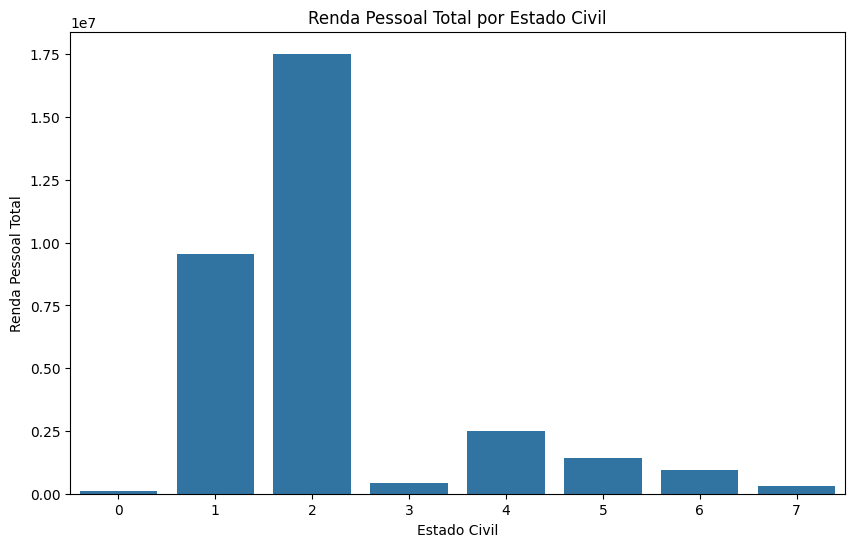

In [ ]:
# Plotar o barplot com Seaborn
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ESTADO_CIVIL', y='RENDA_PESSOAL_TOTAL', data=df_EC)
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.title('Renda Pessoal Total por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Renda Pessoal Total')
plt.show()

In [ ]:
df_target = dados.groupby('ROTULO_ALVO_MAU=1')['RENDA_PESSOAL_TOTAL'].sum().astype(int)
# Converter o resultado para DataFrame se necessário
df_target = pd.DataFrame(df_target)

# Resetar o índice se necessário
df_target.reset_index(inplace=True)
df_target

,ROTULO_ALVO_MAU=1,RENDA_PESSOAL_TOTAL
0,0,23263678
1,1,9467638


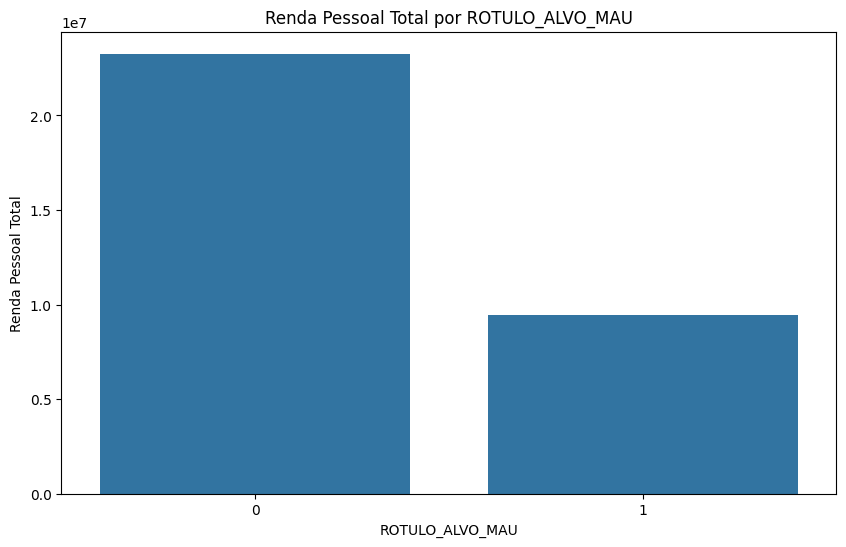

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ROTULO_ALVO_MAU=1', y='RENDA_PESSOAL_TOTAL', data=df_target)
plt.title('Renda Pessoal Total por ROTULO_ALVO_MAU')
plt.xlabel('ROTULO_ALVO_MAU')
plt.ylabel('Renda Pessoal Total')
plt.show()

In [ ]:

df_TO = dados.groupby('TIPO_OCUPACAO')['RENDA_PESSOAL_TOTAL'].sum().astype(float)
# Converter o resultado para DataFrame se necessário
df_TO = pd.DataFrame(df_TO)

# Resetar o índice se necessário
df_TO.reset_index(inplace=True)
df_TO

,TIPO_OCUPACAO,RENDA_PESSOAL_TOTAL
0,0.0,1773928.00
1,1.0,5622291.33
2,2.0,11571022.32
3,3.0,290953.74
4,4.0,4237063.52
5,5.0,5765745.79
6,6.0,3470312.36


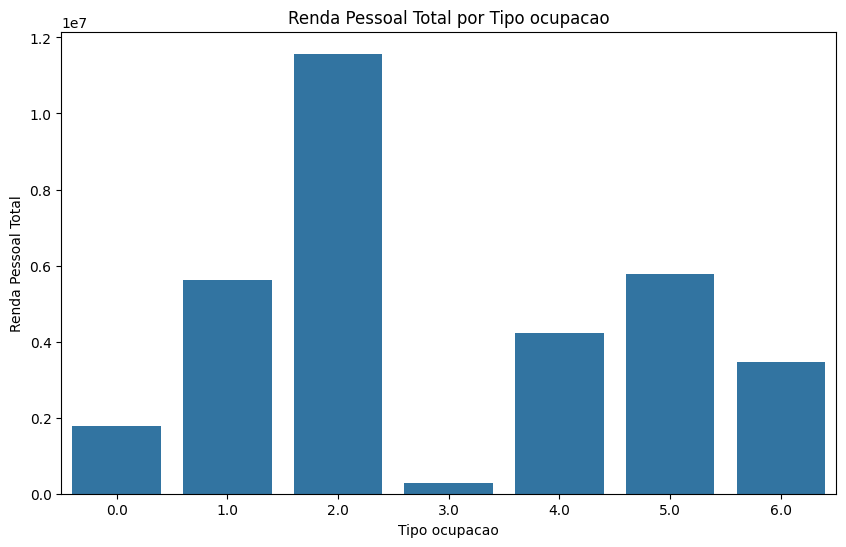

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='TIPO_OCUPACAO', y='RENDA_PESSOAL_TOTAL', data=df_TO)
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.title('Renda Pessoal Total por Tipo ocupacao')
plt.xlabel('Tipo ocupacao')
plt.ylabel('Renda Pessoal Total')
plt.show()

In [ ]:
# Variáveis independentes
X = dados.drop(columns=['ROTULO_ALVO_MAU=1']).astype(float)

# Variável dependente
Y = dados['ROTULO_ALVO_MAU=1']

# Conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y,
                                                                         test_size = 0.20
                                                                         )

In [ ]:
# Criando modelo de Machine Leanring a partir de cada algoritmo
# Vamos utilizar como métrica a acurácia. Quanto maior o valor, melhor.
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in modelos:
    kfold = model_selection.KFold(n_splits=10)
    cross_val_result = model_selection.cross_val_score(modelo, X_treino,
                                                        Y_treino,
                                                        cv = kfold,
                                                        scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

LR: 0.741828 (0.007402)
LDA: 0.741864 (0.007391)
KNN: 0.695011 (0.008840)
CART: 0.616649 (0.007842)
NB: 0.731016 (0.007030)
SVM: 0.741757 (0.007300)


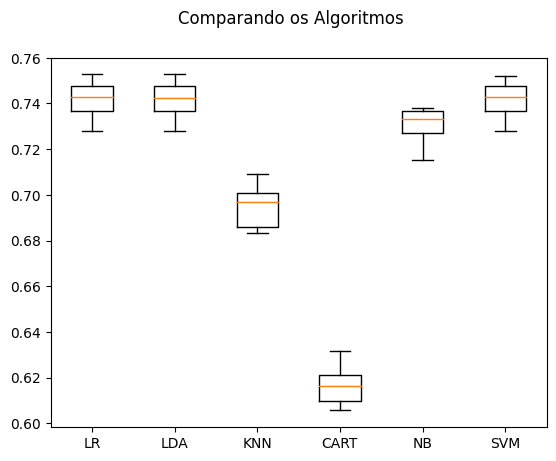

In [ ]:
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [ ]:
# Aplicando Padronização ao conjunto de dados
# Nesta técnica, os dados serão transformados de modo que estejam com uma distribuição normal, com média igual a zero e
# desvio padrão igual a 1.
pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('Scaled-LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in pipelines:
    kfold = model_selection.KFold(n_splits=10)
    cross_val_result = model_selection.cross_val_score(modelo,
                                                     X_treino,
                                                     Y_treino,
                                                     cv = kfold,
                                                     scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.741828 (0.007365)
Scaled-LDA: 0.741864 (0.007391)
Scaled-KNN: 0.694905 (0.005750)
Scaled-CART: 0.618577 (0.008852)
Scaled-NB: 0.728268 (0.006887)
Scaled-SVM: 0.741685 (0.007317)


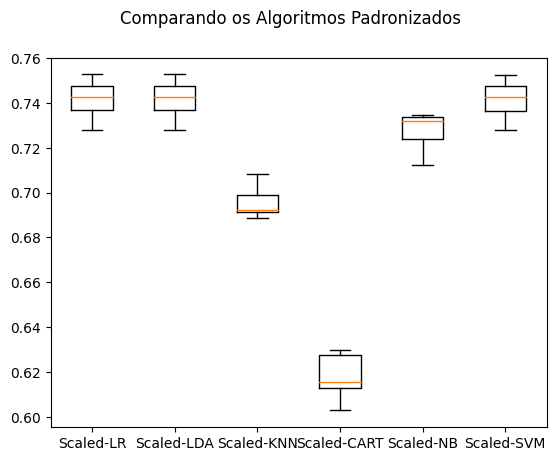

In [ ]:
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [ ]:
# Preparando a versão final do modelo
scaler = StandardScaler().fit(X_treino)
rescaledX = scaler.transform(X_treino)
modelo = SVC(C = 1.2 , kernel='rbf')
modelo.fit(rescaledX, Y_treino)

SVC(C=1.2)

In [ ]:
# Aplicando o modelo aos dados de teste
rescaledValidationX = scaler.transform(X_teste)
previsoes = modelo.predict(rescaledValidationX)

# A acurácia ficou em 0.857, muito próximo do que conseguimos nos dados de treino
print(accuracy_score(Y_teste, previsoes))
print(confusion_matrix(Y_teste, previsoes))
print(classification_report(Y_teste, previsoes))

0.7394034536891679
[[5180    3]
 [1823    1]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      5183
           1       0.25      0.00      0.00      1824

    accuracy                           0.74      7007
   macro avg       0.49      0.50      0.43      7007
weighted avg       0.61      0.74      0.63      7007



# *Conclusão:*

Base Quantum Finance fornecida pelo professor.

O tipo de análise preditiva utilizada foi a de classificação por apresentar melhores resultados quando definimos uma feature onde 'ROTULO_ALVO_MAU=1' ou classe negativa determina que esse cliente apresenta uma possível ameaça de tornar-se inadimplente.

Buscando a melhor precisão média, testamos alguns modelos de machine learning

Regressão Logística (LR): A precisão média é de aproximadamente 74.09%, com uma variação de cerca de 0.81%.

Análise Discriminante Linear (LDA): A precisão média é de aproximadamente 74.09%, com uma variação de cerca de 0.82%.

K-Vizinhos Mais Próximos (KNN): A precisão média é de aproximadamente 69.01%, com uma variação de cerca de 0.57%.

Árvores de Decisão (CART): A precisão média é de aproximadamente 62.05%, com uma variação de cerca de 0.88%.

Naive Bayes (NB): A precisão média é de aproximadamente 72.82%, com uma variação de cerca de 0.78%.

Máquinas de Vetores de Suporte (SVM): A precisão média é de aproximadamente 74.09%, com uma variação de cerca de 0.82%.

A Análise Discriminante Linear (LDA), Regressão Logística (LR) e Máquinas de Vetores de Suporte (SVM) mostraram a precisão média mais alta, com aproximadamente 74.09%.


Dado isso, utlizando o SVM com o algorítmo SVC e a classe negativa o modelo obteve assertividade de 0.7394034536891679  observa-se que os modelos tiveram um desempenho aceitável na previsão da classe negativa, alcançando uma precisão e recall relativamente altos. Isso indica que os modelos foram capazes de identificar corretamente a maioria dos casos negativos, ou seja, aqueles em que a classe verdadeira é 0.